In [69]:
%pip install openpyxl
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install plotly_express
%pip install nbformat
%pip install association_metrics
%pip install scikit-learn
%pip install scipy
%pip install geopy
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [70]:
import pandas as pd
import numpy as np
import os
import missingno as msno
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

In [71]:
data = pd.read_csv("airbnb_data.csv")
data.head(5)

/var/folders/6d/1vk7nfqs0gl7gq1l230xxbrw0000gn/T/ipykernel_64751/2702963829.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("airbnb_data.csv")


,City,last_scraped,source,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,...,reviews_per_month,bedrooms,baths,verification_count,average_review,distance_to_centre,host_duration_years,listing_age_years,recency_years,review_scores_variance
0,Bergamo,2023-12-29,city scrape,NaN,https://a0.muscache.com/pictures/prohost-api/H...,21763382,https://www.airbnb.com/users/show/21763382,Compagnie Immobiliari Associate,2014-09-25,"Bergamo, Italy",...,0.28,1.0,1.0,2,4.714286,19.571726,9.448323,2.245038,0.547570,0.041095
1,Bergamo,2023-12-29,city scrape,NaN,https://a0.muscache.com/pictures/prohost-api/H...,392969278,https://www.airbnb.com/users/show/392969278,Marina,2021-03-17,"Passirano, Italy",...,0.63,1.0,1.0,3,4.760000,29.815869,2.973306,1.891855,0.484600,0.008967
2,Bergamo,2023-12-29,city scrape,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,517350267,https://www.airbnb.com/users/show/517350267,Matteo,2023-05-30,NaN,...,1.13,1.0,1.0,2,4.951429,24.498594,0.772074,0.624230,0.451745,0.006881
3,Bergamo,2023-12-30,city scrape,"L’ appartamento, silenzioso e luminoso si trov...",https://a0.muscache.com/pictures/miso/Hosting-...,2831947,https://www.airbnb.com/users/show/2831947,Marzio,2012-07-04,NaN,...,3.24,2.0,2.0,2,4.881429,2.053675,11.674196,1.982204,0.224504,0.005314
4,Bergamo,2023-12-30,city scrape,Immergetevi nell'atmosfera incantata di Borgo ...,https://a0.muscache.com/pictures/6f618791-cdfd...,112088465,https://www.airbnb.com/users/show/112088465,Alice & Michele,2017-01-18,"Geneva, Switzerland",...,2.22,1.0,1.0,2,4.914286,1.437623,7.132101,0.553046,0.208077,0.008095


In [72]:
data.columns

Index(['City', 'last_scraped', 'source', 'neighborhood_overview',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',


In [73]:
data['average_review'].head(10)
       

0    4.714286
1    4.760000
2    4.951429
3    4.881429
4    4.914286
5    4.825714
6    4.918571
7    4.285714
8    5.000000
9    4.808571
Name: average_review, dtype: float64

### Select Geo Related Columns

In [74]:
Geo_columns = ['City',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'price',
       'distance_to_centre']

Geo_Data = data[Geo_columns]
Geo_Data['price'] = Geo_Data['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
Geo_Data.head(10)

/var/folders/6d/1vk7nfqs0gl7gq1l230xxbrw0000gn/T/ipykernel_64751/4051670759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Geo_Data['price'] = Geo_Data['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)


,City,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,distance_to_centre
0,Bergamo,NaN,Dossena,NaN,45.879800,9.697220,Entire rental unit,Entire home/apt,4,142.0,19.571726
1,Bergamo,NaN,Parzanica,NaN,45.736980,10.039873,Entire rental unit,Entire home/apt,4,176.0,29.815869
2,Bergamo,NaN,Ranzanico,NaN,45.789980,9.950410,Entire rental unit,Entire home/apt,4,160.0,24.498594
3,Bergamo,"Bergamo, Lombardia, Italy",Bergamo,NaN,45.687990,9.667020,Entire vacation home,Entire home/apt,6,75.0,2.053675
4,Bergamo,"Bergamo, Lombardia, Italy",Bergamo,NaN,45.699067,9.675348,Entire rental unit,Entire home/apt,4,100.0,1.437623
5,Bergamo,NaN,Trescore Balneario,NaN,45.696320,9.839770,Private room in rental unit,Private room,1,35.0,14.077985
6,Bergamo,NaN,San Pellegrino Terme,NaN,45.842590,9.665370,Entire condo,Entire home/apt,2,85.0,15.221748
7,Bergamo,NaN,Rota d'Imagna,NaN,45.828234,9.516245,Entire rental unit,Entire home/apt,5,30.0,17.597193
8,Bergamo,"Bergamo, Lombardia, Italy",Bergamo,NaN,45.691540,9.666430,Entire condo,Entire home/apt,8,179.0,1.663795
9,Bergamo,NaN,Bergamo,NaN,45.696180,9.677850,Entire serviced apartment,Entire home/apt,4,135.0,1.778169


## Explore Geo Related Features


### Missing Values

In [75]:
total_missing = Geo_Data.isnull().values.sum()
print("Total missing " + str(total_missing))
total_missing_cwise = Geo_Data.isna().sum()
total_missing_cwise

Total missing 258363


City                                 0
neighbourhood                    98441
neighbourhood_cleansed               0
neighbourhood_group_cleansed    149111
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
price                            10811
distance_to_centre                   0
dtype: int64

<AxesSubplot: >

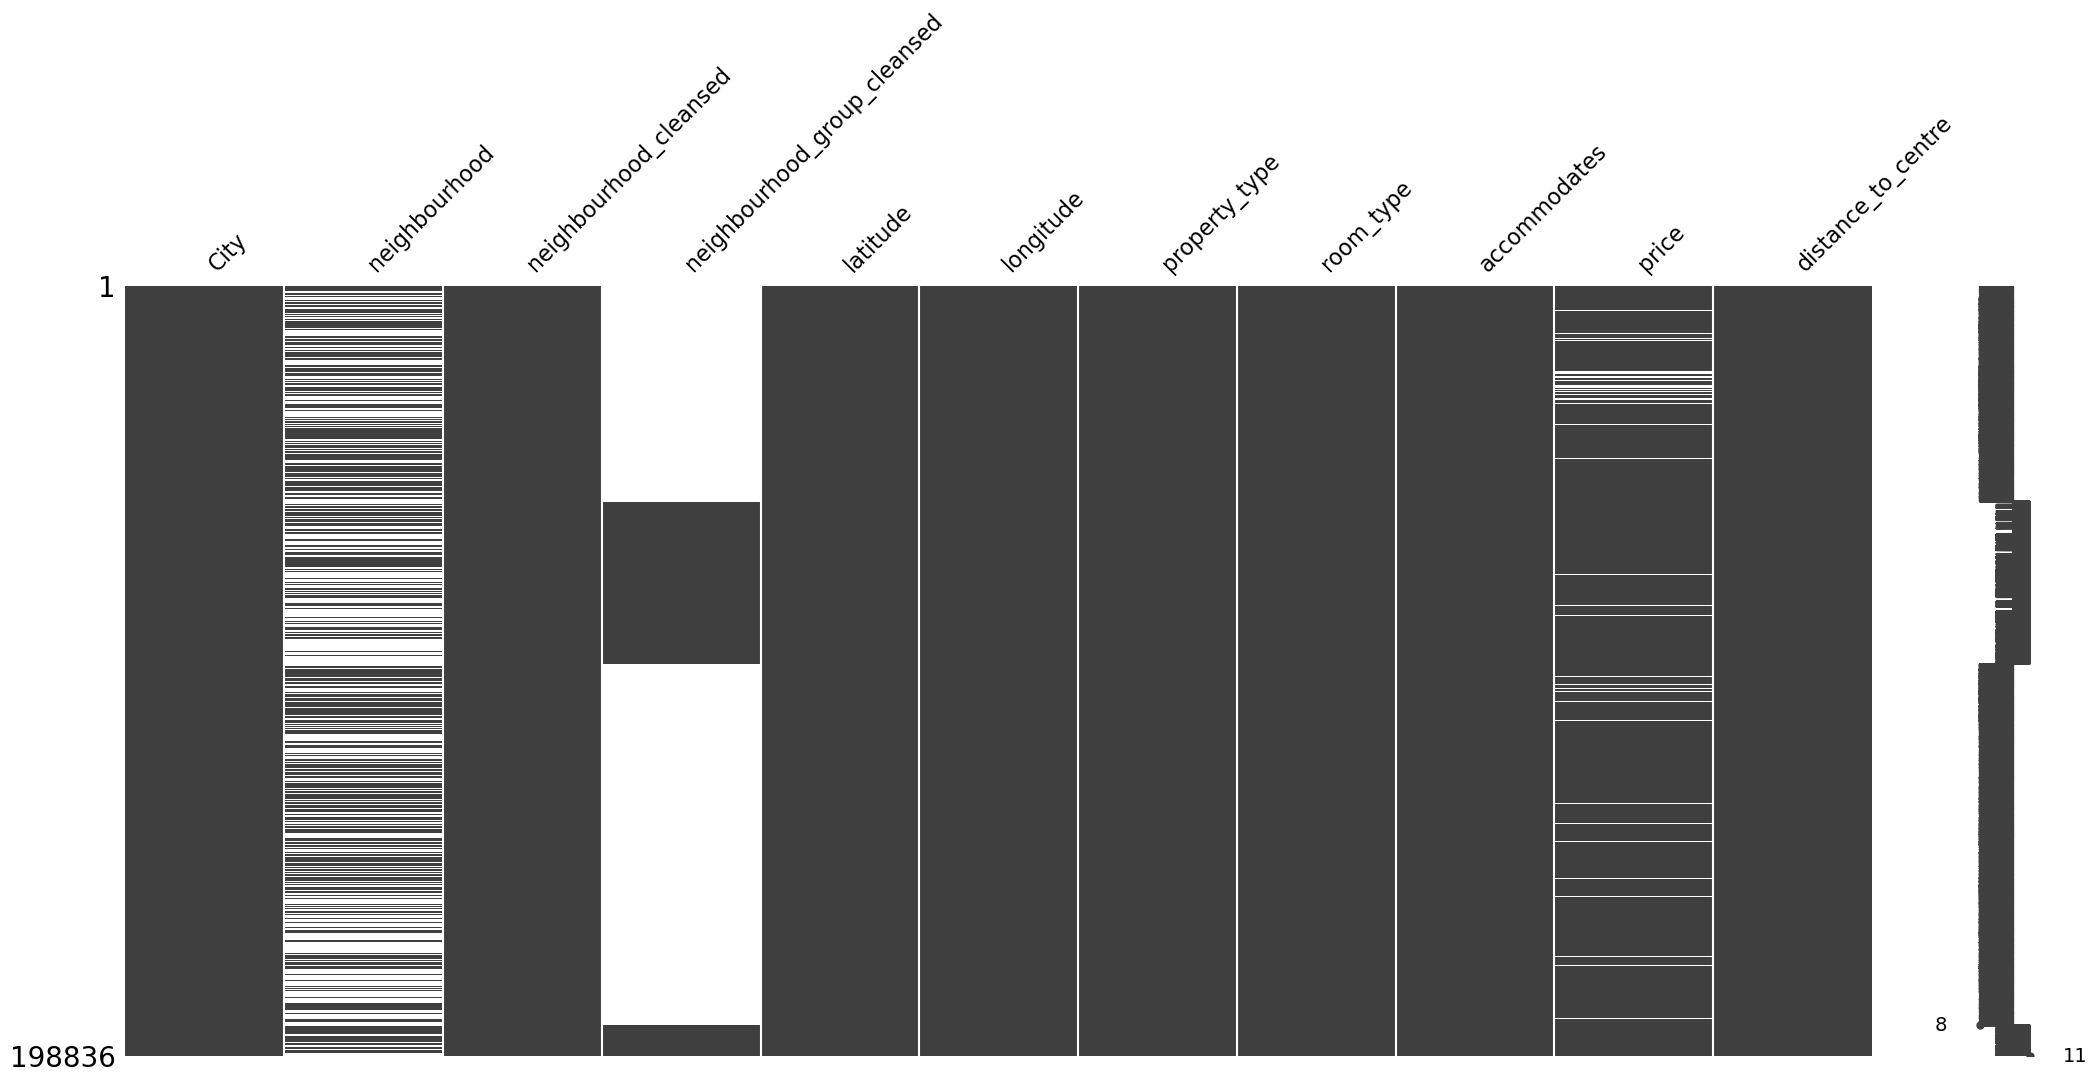

In [76]:
msno.matrix(Geo_Data)

### Correlations

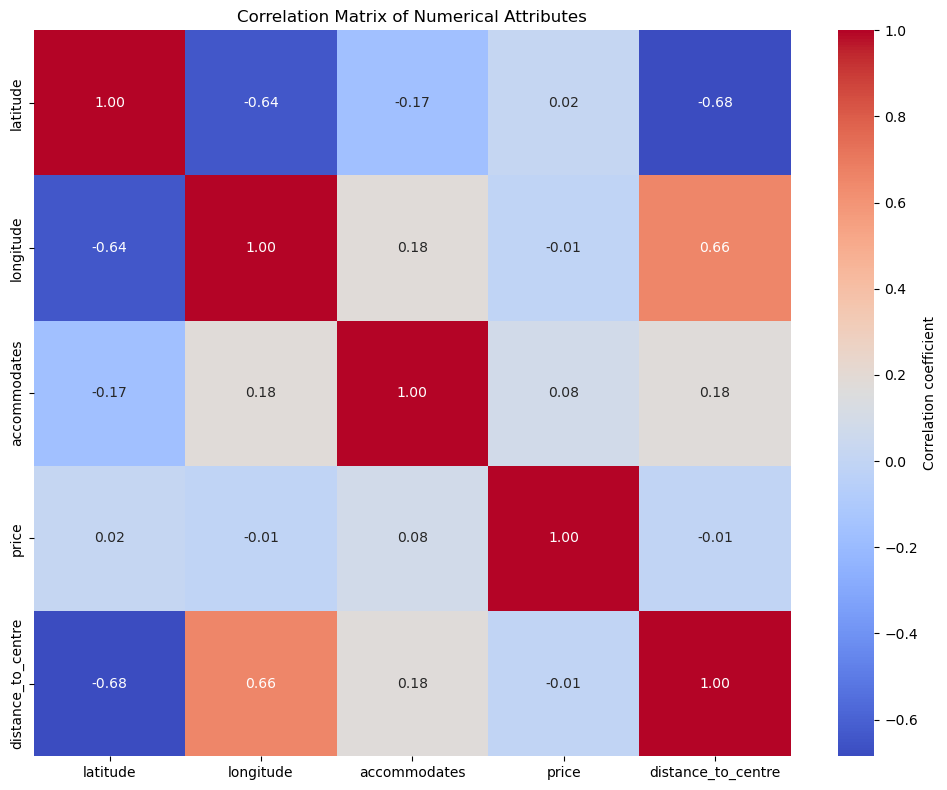

In [77]:
# Select numerical columns only (float64 and int64 data types)
numerical_data = Geo_Data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numerical_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation coefficient'})
plt.title("Correlation Matrix of Numerical Attributes")
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

### City x Price

In [78]:
City_stats = Geo_Data.groupby('City')['price'].agg(
    Mean='mean',
    Median='median',
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    Min='min',
    Q1=lambda x: x.quantile(0.25),
    Q2=lambda x: x.quantile(0.5),
    Q3=lambda x: x.quantile(0.75),
    Max='max'
).reset_index()

City_stats

,City,Mean,Median,Mode,Min,Q1,Q2,Q3,Max
0,Bergamo,172.528887,96.0,80.0,10.0,70.0,96.0,141.0,8500.0
1,Bologna,133.296007,89.0,100.0,11.0,67.0,89.0,122.0,9999.0
2,Florence,209.099904,116.0,100.0,10.0,82.0,116.0,180.0,95195.0
3,Milan,176.920420,102.0,100.0,10.0,76.0,102.0,153.0,90000.0
4,Naples,120.884654,89.0,80.0,10.0,66.0,89.0,121.0,10000.0
5,Puglia,168.546497,90.0,100.0,9.0,63.0,90.0,149.0,90000.0
6,Rome,172.378912,105.0,100.0,8.0,76.0,105.0,157.0,80000.0
7,Sicily,152.254700,81.0,100.0,9.0,60.0,81.0,128.0,80000.0
8,Trentino,205.863618,130.0,100.0,13.0,94.0,130.0,200.0,21000.0
9,Venice,243.855180,129.0,120.0,11.0,90.0,129.0,190.0,16800.0


### Boxplot City x Price

Findings:
1. Outliers in most cities

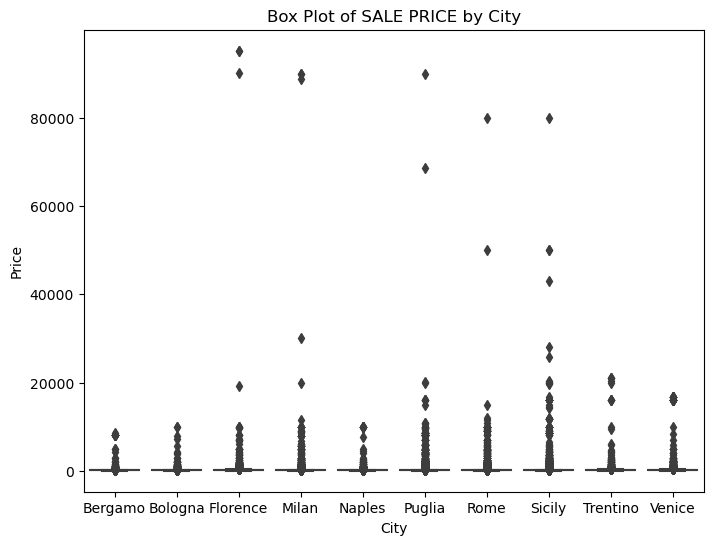

In [79]:
# Create a box plot using seaborn
plt.figure(figsize=(8, 6))  # Set the figure size (adjust as needed)
sns.boxplot(x='City', y='price', data=Geo_Data)

# Add labels and title
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Box Plot of SALE PRICE by City')

# Disable scientific notation for y-axis labels
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

In [80]:
NB_stats = Geo_Data.groupby('neighbourhood_cleansed')['price'].agg(
    Mean='mean',
    Median='median',
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    Min='min',
    Q1=lambda x: x.quantile(0.25),
    Q2=lambda x: x.quantile(0.5),
    Q3=lambda x: x.quantile(0.75),
    Max='max'
).reset_index()

NB_stats

,neighbourhood_cleansed,Mean,Median,Mode,Min,Q1,Q2,Q3,Max
0,ADRIANO,150.112500,80.0,80.0,30.0,59.50,80.0,112.50,2000.0
1,AFFORI,109.620192,80.0,79.0,24.0,59.50,80.0,116.75,2000.0
2,Acate,85.909091,70.0,40.0,39.0,48.25,70.0,96.00,315.0
3,Accadia,267.000000,267.0,44.0,44.0,155.50,267.0,378.50,490.0
4,Aci Bonaccorsi,67.272727,50.0,48.0,46.0,48.50,50.0,73.50,150.0
...,...,...,...,...,...,...,...,...,...
1015,Zelarino,81.400000,80.0,50.0,50.0,58.00,80.0,99.00,120.0
1016,Zogno,94.166667,80.5,62.0,60.0,62.25,80.5,91.75,254.0
1017,Zollino,391.766667,198.0,60.0,26.0,60.00,198.0,484.50,1843.0
1018,Zona Commerciale via Torino,78.030303,68.0,62.0,43.0,62.00,68.0,85.00,150.0


### Remove Outliers 1.5X IQR

In [81]:
Q1 = Geo_Data['price'].quantile(0.25)
Q3 = Geo_Data['price'].quantile(0.75)
IQR = Q3 - Q1

# Typically, 1.5 * IQR is used to define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Geo_Data_OF = Geo_Data[(Geo_Data['price'] >= lower_bound) & (Geo_Data['price'] <= upper_bound)]


### Average Price per city

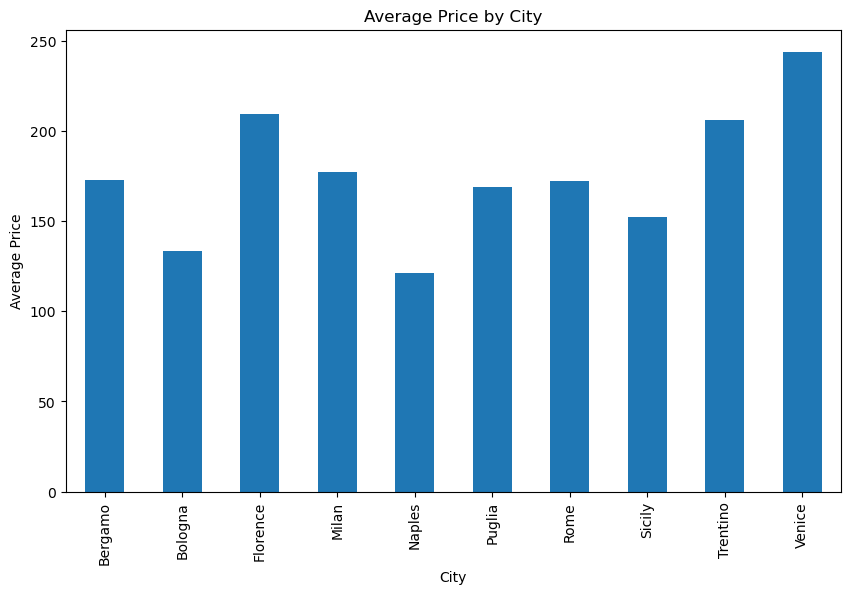

In [82]:
# Calculate the average price per city
average_price_per_city = Geo_Data.groupby('City')['price'].mean()

# Plot setup
plt.figure(figsize=(10, 6))

# Plot the average price for each city
average_price_per_city.plot(kind='bar')

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Average Price')
plt.title('Average Price by City')

# Show plot
plt.show()

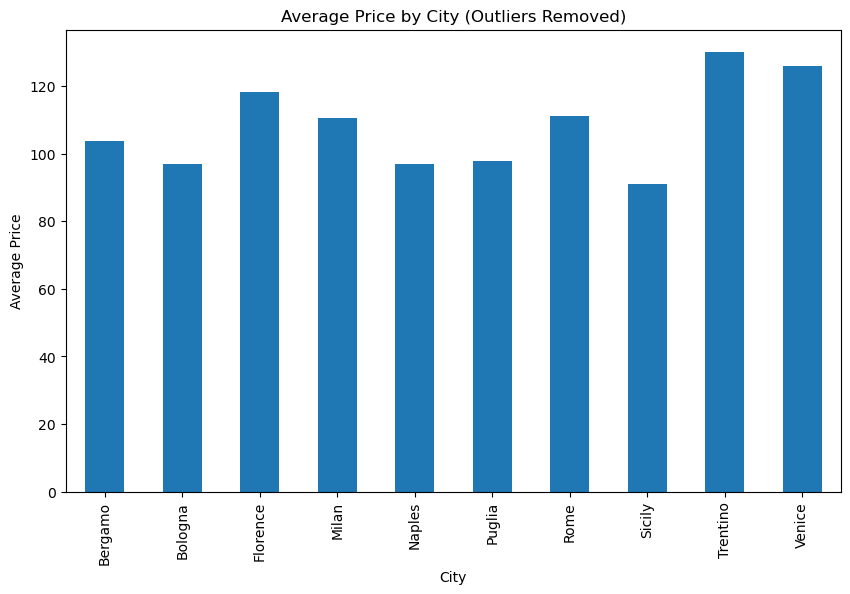

In [83]:
# Calculate the average price per city
average_price_per_city = Geo_Data_OF.groupby('City')['price'].mean()

# Plot setup
plt.figure(figsize=(10, 6))

# Plot the average price for each city
average_price_per_city.plot(kind='bar')

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Average Price')
plt.title('Average Price by City (Outliers Removed)')

# Show plot
plt.show()

### Plot Price by Distance from City Center

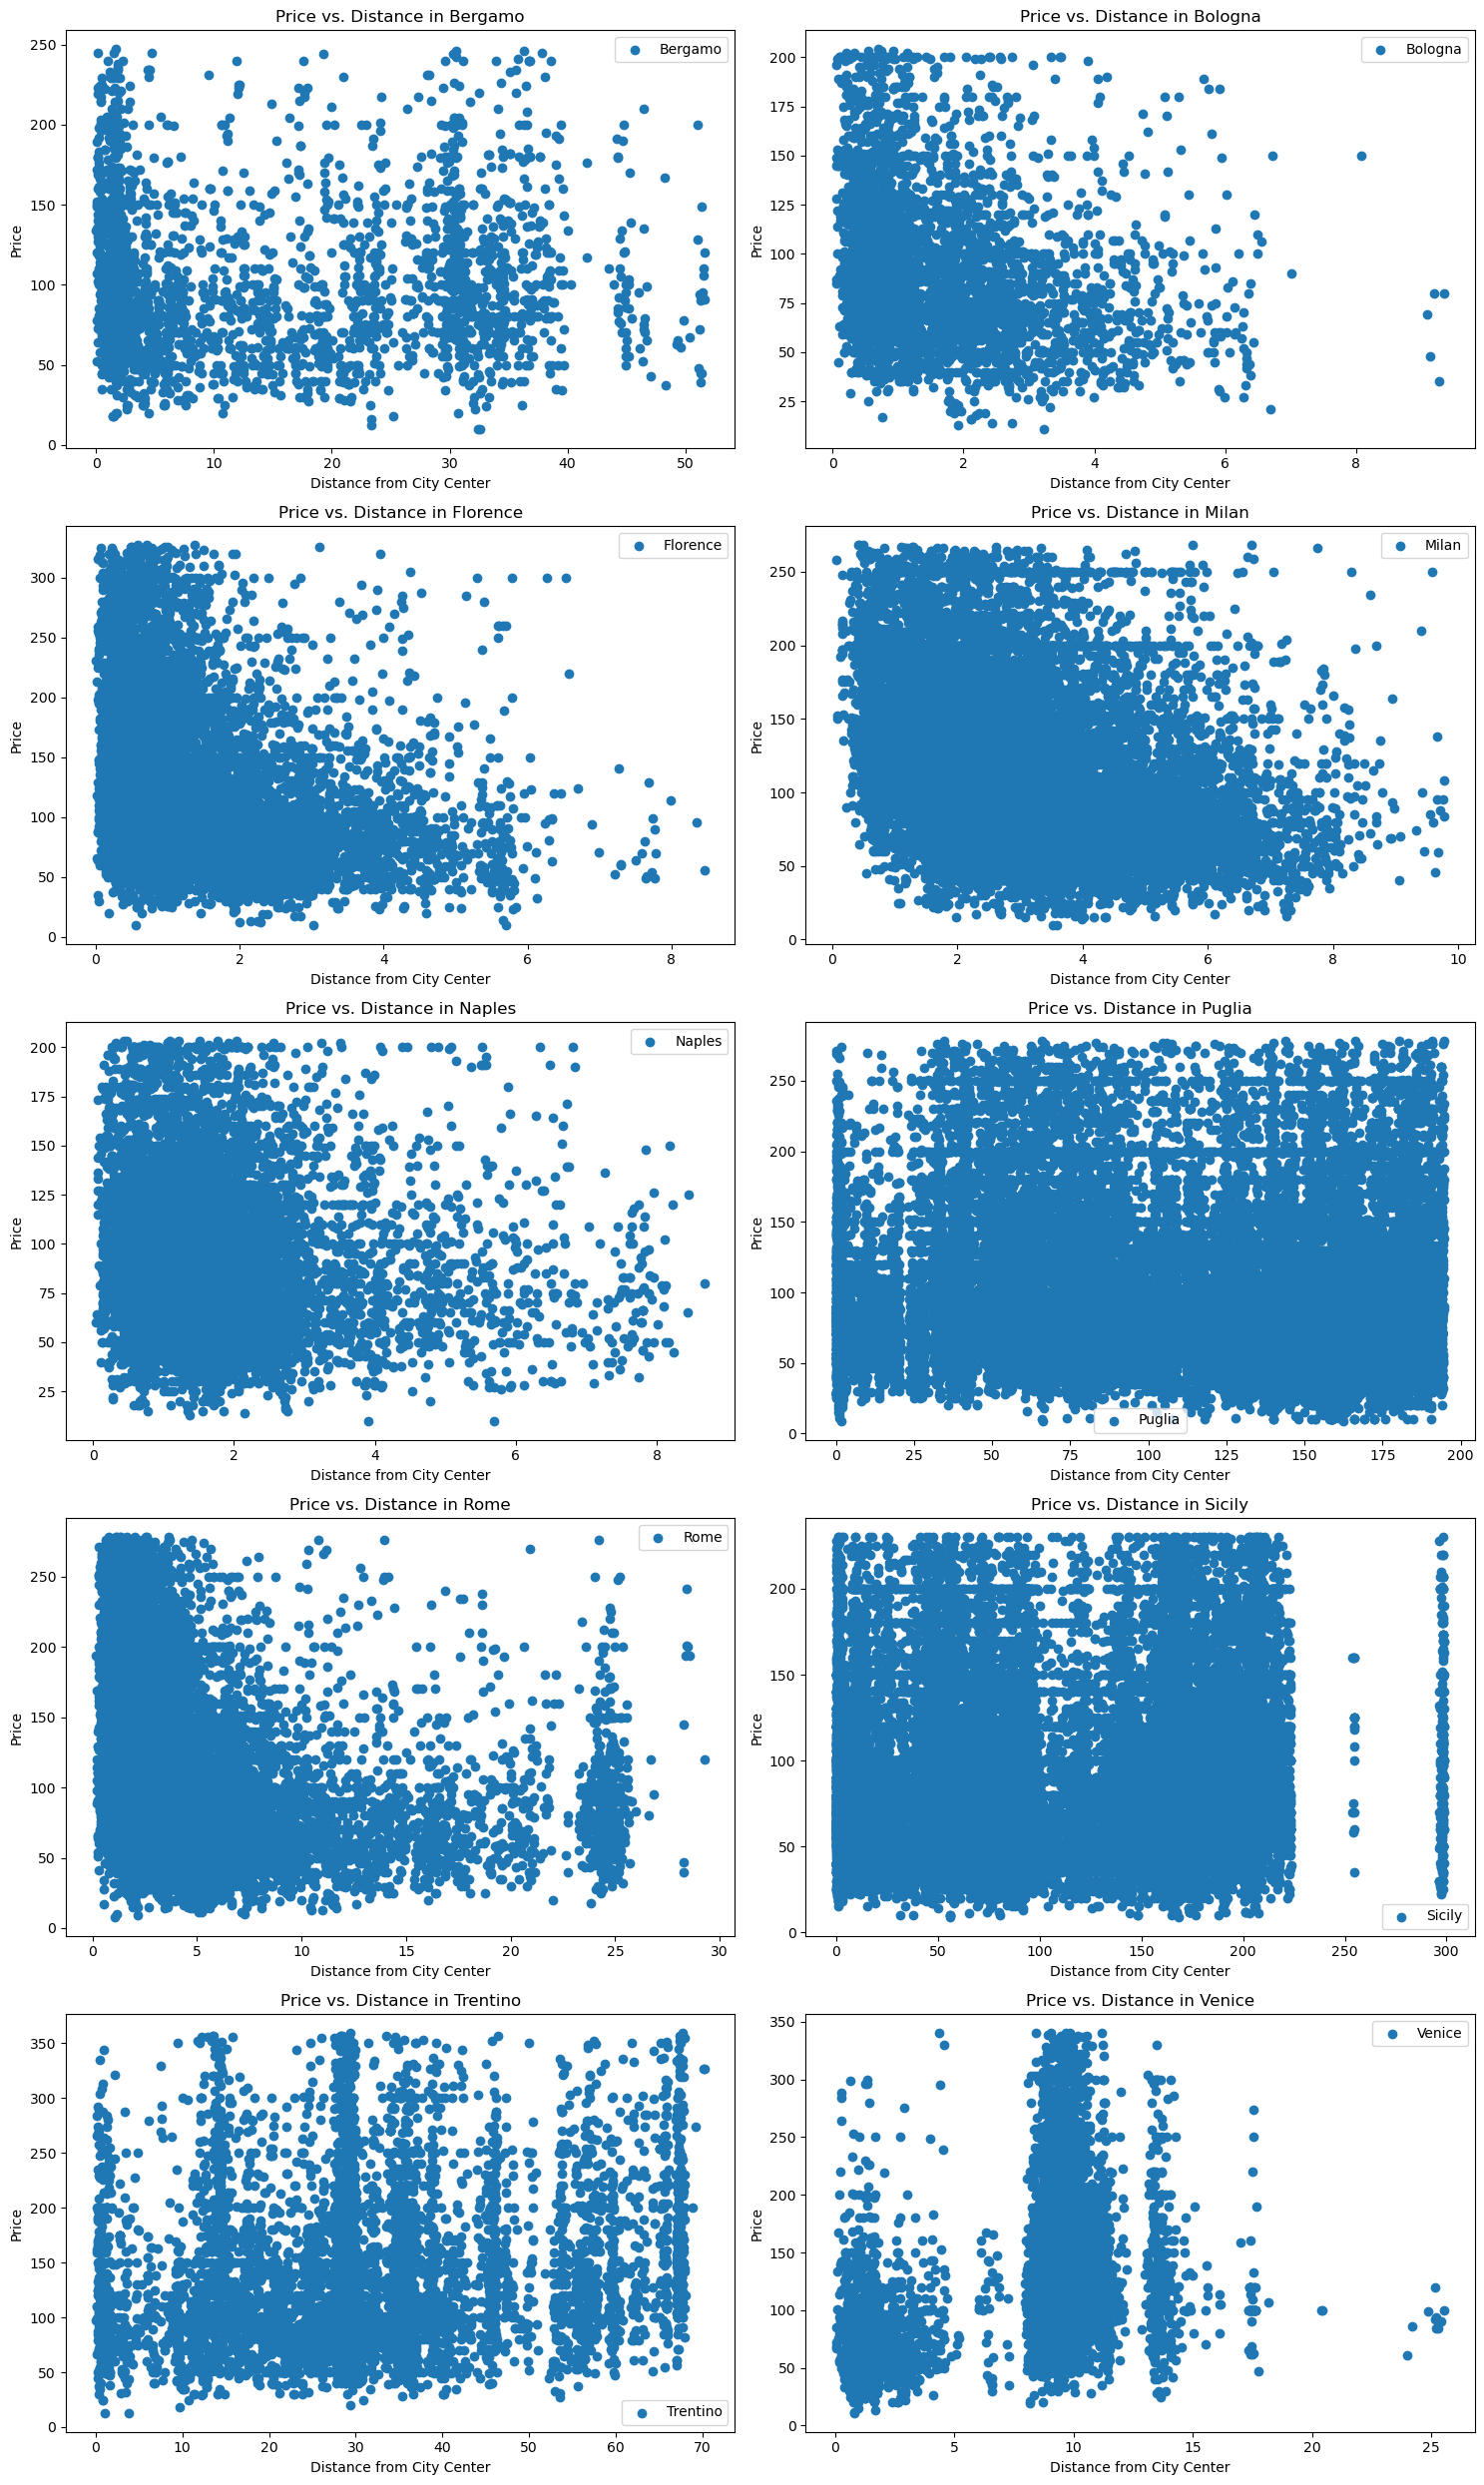

In [84]:
# Determine the number of unique cities
unique_cities = Geo_Data['City'].unique()
num_cities = len(unique_cities)

# Calculate the number of rows needed when using 2 columns
num_rows = (num_cities + 1) // 2  # Add one to handle odd number of cities

# Setup the figure and subplots with 2 columns
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
axs = axs.flatten()  # Flatten the array of axes to make iterating easier

for index, city in enumerate(unique_cities):
    # Extract data for the current city
    city_data = Geo_Data[Geo_Data['City'] == city]
    
    Q1 = city_data['price'].quantile(0.25)
    Q3 = city_data['price'].quantile(0.75)
    IQR = Q3 - Q1

    # Typically, 1.5 * IQR is used to define outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outlier prices
    city_data = city_data[(city_data['price'] >= lower_bound) & (city_data['price'] <= upper_bound)]
    
    # Plot data for each city on its subplot
    axs[index].scatter(city_data['distance_to_centre'], city_data['price'], label=city)
    axs[index].set_xlabel('Distance from City Center')
    axs[index].set_ylabel('Price')
    axs[index].set_title(f'Price vs. Distance in {city}')
    axs[index].legend()

# In case the number of cities is odd, hide the last subplot if it's unused
if num_cities % 2 != 0:
    axs[-1].axis('off')  # Hide the last subplot

# Adjust layout
plt.tight_layout()
plt.show()

## Hypothesis Testing:
### Hypothesis: For each city do changes in the distance from the cities center impact the cost?

In [85]:
from scipy import stats
import numpy as np
import pandas as pd

# Assuming Geo_Data is your DataFrame and it has been preprocessed
city_mean_prices = Geo_Data.groupby('City')['price'].mean().to_dict()

results = {}
for city, mean_price in city_mean_prices.items():
    city_data = Geo_Data[(Geo_Data['City'] == city) & (Geo_Data['distance_to_centre'] >= 5)]
    if len(city_data) < 2:
        continue  # Skip cities with too few data points

    # Normality Test using Kolmogorov-Smirnov
    # Assuming we know the mean and standard deviation for the normality assumption
    ks_stat, p_value_normality = stats.kstest(city_data['price'], 'norm', args=(city_data['price'].mean(), city_data['price'].std()))

    if p_value_normality > 0.05:  # Data follow a normal distribution
        # T-test
        t_stat, p_value = stats.ttest_1samp(city_data['price'], popmean=mean_price)
        test_used = 'T-test'
    else:
        # Wilcoxon signed-rank test - we need to check if zero can be a median hypothesis
        if np.all(city_data['price'] - mean_price == 0):
            continue  # This would fail as all differences are zero
        # Differences from the hypothesized mean
        diff = city_data['price'] - mean_price
        if len(diff.dropna()) < 2:
            continue  # Not enough data after dropping NA
        stat, p_value = stats.wilcoxon(diff.dropna())
        test_used = 'Wilcoxon'

    results[city] = (test_used, stat, p_value)

# Print results
for city, (test_used, stat, p_value) in results.items():
    print(f"City: {city}, Test used: {test_used}, Statistic: {stat}, P-value: {p_value}")


City: Bergamo, Test used: Wilcoxon, Statistic: 240632.0, P-value: 1.0837438234126616e-130
City: Bologna, Test used: Wilcoxon, Statistic: 997.0, P-value: 5.244056202546047e-10
City: Florence, Test used: Wilcoxon, Statistic: 3247.0, P-value: 2.1660057878549155e-15
City: Milan, Test used: Wilcoxon, Statistic: 222424.0, P-value: 3.4324158953238426e-216
City: Naples, Test used: Wilcoxon, Statistic: 15515.0, P-value: 2.25356420361371e-17
City: Puglia, Test used: Wilcoxon, Statistic: 179160582.0, P-value: 0.0
City: Rome, Test used: Wilcoxon, Statistic: 1329696.0, P-value: 0.0
City: Sicily, Test used: Wilcoxon, Statistic: 271220436.0, P-value: 0.0
City: Trentino, Test used: Wilcoxon, Statistic: 5895668.0, P-value: 3.287118589867727e-284
City: Venice, Test used: Wilcoxon, Statistic: 3673392.0, P-value: 0.0


Is it a linear relationship?

In [86]:
import statsmodels.api as sm

NAFilled_Geo_Data = Geo_Data.dropna(subset=['price', 'distance_to_centre'], inplace=True)

results = {}
for city in Geo_Data['City'].unique():
    city_data = Geo_Data[Geo_Data['City'] == city]
    X = sm.add_constant(city_data['distance_to_centre'])  # adding a constant
    model = sm.OLS(city_data['price'], X).fit()
    results[city] = (model.pvalues['distance_to_centre'], model.params['distance_to_centre'])

# Display results
for city, (p_value, coef) in results.items():
    print(f"City: {city}, P-value: {p_value}, Coefficient: {coef}")

City: Bergamo, P-value: 0.0002578451449499462, Coefficient: 2.8286441601697034
City: Bologna, P-value: 0.2786952988981848, Coefficient: -4.219750909219924
City: Florence, P-value: 0.1070019521394493, Coefficient: -20.538573829087845
City: Milan, P-value: 0.07475514520690696, Coefficient: -9.47774391377921
City: Naples, P-value: 0.004366449843396998, Coefficient: -7.1907812091800976
City: Puglia, P-value: 0.20375388547188109, Coefficient: -0.08132053710541384
City: Rome, P-value: 0.1038872436821144, Coefficient: -1.6493045623944462
City: Sicily, P-value: 0.0004893977630432017, Coefficient: 0.14707180686891613
City: Trentino, P-value: 0.002640835514400925, Coefficient: 1.5133894620309931
City: Venice, P-value: 1.6482702516953806e-13, Coefficient: -23.936570781935487


/var/folders/6d/1vk7nfqs0gl7gq1l230xxbrw0000gn/T/ipykernel_64751/1886174232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NAFilled_Geo_Data = Geo_Data.dropna(subset=['price', 'distance_to_centre'], inplace=True)


In [95]:
Geo_Data_Enc = pd.get_dummies(Geo_Data_OF, columns=['City', 'neighbourhood_cleansed']).drop(columns=['accommodates','neighbourhood', 'neighbourhood_group_cleansed', 'room_type', 'property_type'])
Geo_Data_Enc.head()

,latitude,longitude,price,distance_to_centre,City_Bergamo,City_Bologna,City_Florence,City_Milan,City_Naples,City_Puglia,...,neighbourhood_cleansed_XXII MARZO,neighbourhood_cleansed_Zafferana Etnea,neighbourhood_cleansed_Zandobbio,neighbourhood_cleansed_Zanica,neighbourhood_cleansed_Zapponeta,neighbourhood_cleansed_Zelarino,neighbourhood_cleansed_Zogno,neighbourhood_cleansed_Zollino,neighbourhood_cleansed_Zona Commerciale via Torino,neighbourhood_cleansed_Zona Industriale
0,45.879800,9.697220,142.0,19.571726,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45.736980,10.039873,176.0,29.815869,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.789980,9.950410,160.0,24.498594,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.687990,9.667020,75.0,2.053675,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,45.699067,9.675348,100.0,1.437623,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Predictive Models
### Regression


In [96]:
X_train, X_test, y_train, y_test = train_test_split(Geo_Data_Enc.drop(columns='price'), Geo_Data_Enc['price'], test_size=0.3, random_state=40)
y_pred = None

In [97]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def train_test(model,X_tr, X_te, y_tr, y_te):
    print(model)
    model.fit(X_tr, y_tr)
    print("RMSE train: {}".format(rmse(y_tr, model.predict(X_tr))))
    print("RMSE test: {}".format(rmse(y_te, model.predict(X_te))))


In [98]:
model = LinearRegression()
train_test(model, X_train, X_test, y_train, y_test)
y_pred = model.predict(X_train)


LinearRegression()
RMSE train: 48.530335590563794
RMSE test: 1343085089.414879


In [99]:
for city in Geo_Data_OF['City'].unique():
    print(city)
    city_data = Geo_Data_OF[Geo_Data_OF['City'] == city]
    City_Data_Enc = pd.get_dummies(city_data, columns=['City', 'neighbourhood_cleansed']).drop(columns=['accommodates', 'neighbourhood', 'neighbourhood_group_cleansed', 'room_type', 'property_type'])
    X_train, X_test, y_train, y_test = train_test_split(City_Data_Enc.drop(columns='price'), City_Data_Enc['price'], test_size=0.3, random_state=40)
    model = LinearRegression()
    train_test(model,X_train, X_test, y_train, y_test)
    y_pred = model.predict(X_train)

Bergamo
LinearRegression()
RMSE train: 44.52224687771305
RMSE test: 453975056445.2168
Bologna
LinearRegression()
RMSE train: 44.71086241979866
RMSE test: 44.626205601706495
Florence
LinearRegression()
RMSE train: 51.3984798635998
RMSE test: 52.05368191886752
Milan
LinearRegression()
RMSE train: 47.7602739656393
RMSE test: 1523909100871.539
Naples
LinearRegression()
RMSE train: 44.80099390956413
RMSE test: 44.62703383992208
Puglia
LinearRegression()
RMSE train: 49.48281785027243
RMSE test: 191986922.43478864
Rome
LinearRegression()
RMSE train: 48.68531903284664
RMSE test: 48.38374764367041
Sicily
LinearRegression()
RMSE train: 47.267448176780235
RMSE test: 30366564911.78491
Trentino
LinearRegression()
RMSE train: 54.24048028734545
RMSE test: 54.16879220949961
Venice
LinearRegression()
RMSE train: 48.70510680055628
RMSE test: 48.80326827380086


### Random Forest

In [100]:
model = RandomForestRegressor(n_estimators=500, random_state=40, max_depth=6)
train_test(model, X_train, X_test, y_train, y_test)
y_pred = model.predict(X_train)


RandomForestRegressor(max_depth=6, n_estimators=500, random_state=40)
RMSE train: 46.843658949925
RMSE test: 48.274685697988055


In [101]:
for city in Geo_Data_OF['City'].unique():
    print(city)
    city_data = Geo_Data_OF[Geo_Data_OF['City'] == city]
    City_Data_Enc = pd.get_dummies(city_data, columns=['City', 'neighbourhood_cleansed']).drop(columns=['accommodates','neighbourhood', 'neighbourhood_group_cleansed', 'room_type', 'property_type'])
    X_train, X_test, y_train, y_test = train_test_split(City_Data_Enc.drop(columns='price'), City_Data_Enc['price'], test_size=0.3, random_state=40)
    model = RandomForestRegressor(n_estimators=500, random_state=40, max_depth=6)
    train_test(model,X_train, X_test, y_train, y_test)
    y_pred = model.predict(X_train)

Bergamo
RandomForestRegressor(max_depth=6, n_estimators=500, random_state=40)
RMSE train: 43.97630806614147
RMSE test: 47.66235569882938
Bologna
RandomForestRegressor(max_depth=6, n_estimators=500, random_state=40)
RMSE train: 40.694889670872676
RMSE test: 43.404402644784255
Florence
RandomForestRegressor(max_depth=6, n_estimators=500, random_state=40)
RMSE train: 48.692326352971754
RMSE test: 51.07828553181634
Milan
RandomForestRegressor(max_depth=6, n_estimators=500, random_state=40)
RMSE train: 46.50236881405384
RMSE test: 47.07941423321897
Naples
RandomForestRegressor(max_depth=6, n_estimators=500, random_state=40)
RMSE train: 42.754207287957385
RMSE test: 44.11652629998526
Puglia
RandomForestRegressor(max_depth=6, n_estimators=500, random_state=40)
RMSE train: 48.899606243827975
RMSE test: 49.292348241874905
Rome
RandomForestRegressor(max_depth=6, n_estimators=500, random_state=40)
RMSE train: 46.095366718348934
RMSE test: 46.8638297400545
Sicily
RandomForestRegressor(max_depth=6,

In [102]:
Max_Price = max(Geo_Data_OF["price"])
print(Max_Price)
Min_Price = min(Geo_Data_OF["price"])
print(Min_Price)
print(Max_Price-Min_Price)


273.0
8.0
265.0
